In [ ]:
import pandas as pd
df = pd.read_csv("/content/restaurants_attributes (4).csv")#import data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 52286 non-null  object 
 1   stars                       52286 non-null  float64
 2   review_count                52286 non-null  int64  
 3   is_open                     52286 non-null  int64  
 4   RestaurantsDelivery         52286 non-null  int64  
 5   OutdoorSeating              52286 non-null  int64  
 6   BusinessAcceptsCreditCards  52286 non-null  int64  
 7   BikeParking                 52286 non-null  int64  
 8   RestaurantsPriceRange2      52286 non-null  int64  
 9   RestaurantsTakeOut          52286 non-null  int64  
 10  WiFi                        52286 non-null  int64  
 11  Alcohol                     52286 non-null  int64  
 12  Caters                      52286 non-null  int64  
 13  RestaurantsAttire           522

In [ ]:
n_df = df.drop(['business_id'], axis=1)
from scipy.stats import kstest
for col in n_df.columns:
# iteratre over each column
# compare the column distribution to a normal distribution statistic
 statistic, pval = kstest(n_df[col], "norm")
 print(f"column = {col}")
 print(f"p value = {pval}")
 if pval < 0.05:
  print("Probably not normal")
 else:
  print("Probaly normal")
 print("\n")

column = stars
p value = 0.0
Probably not normal


column = review_count
p value = 0.0
Probably not normal


column = is_open
p value = 0.0
Probably not normal


column = RestaurantsDelivery
p value = 0.0
Probably not normal


column = OutdoorSeating
p value = 0.0
Probably not normal


column = BusinessAcceptsCreditCards
p value = 0.0
Probably not normal


column = BikeParking
p value = 0.0
Probably not normal


column = RestaurantsPriceRange2
p value = 0.0
Probably not normal


column = RestaurantsTakeOut
p value = 0.0
Probably not normal


column = WiFi
p value = 0.0
Probably not normal


column = Alcohol
p value = 0.0
Probably not normal


column = Caters
p value = 0.0
Probably not normal


column = RestaurantsAttire
p value = 0.0
Probably not normal


column = RestaurantsReservations
p value = 0.0
Probably not normal


column = GoodForKids
p value = 0.0
Probably not normal


column = RestaurantsGoodForGroups
p value = 0.0
Probably not normal


column = HasTV
p value = 0.0
Probably 

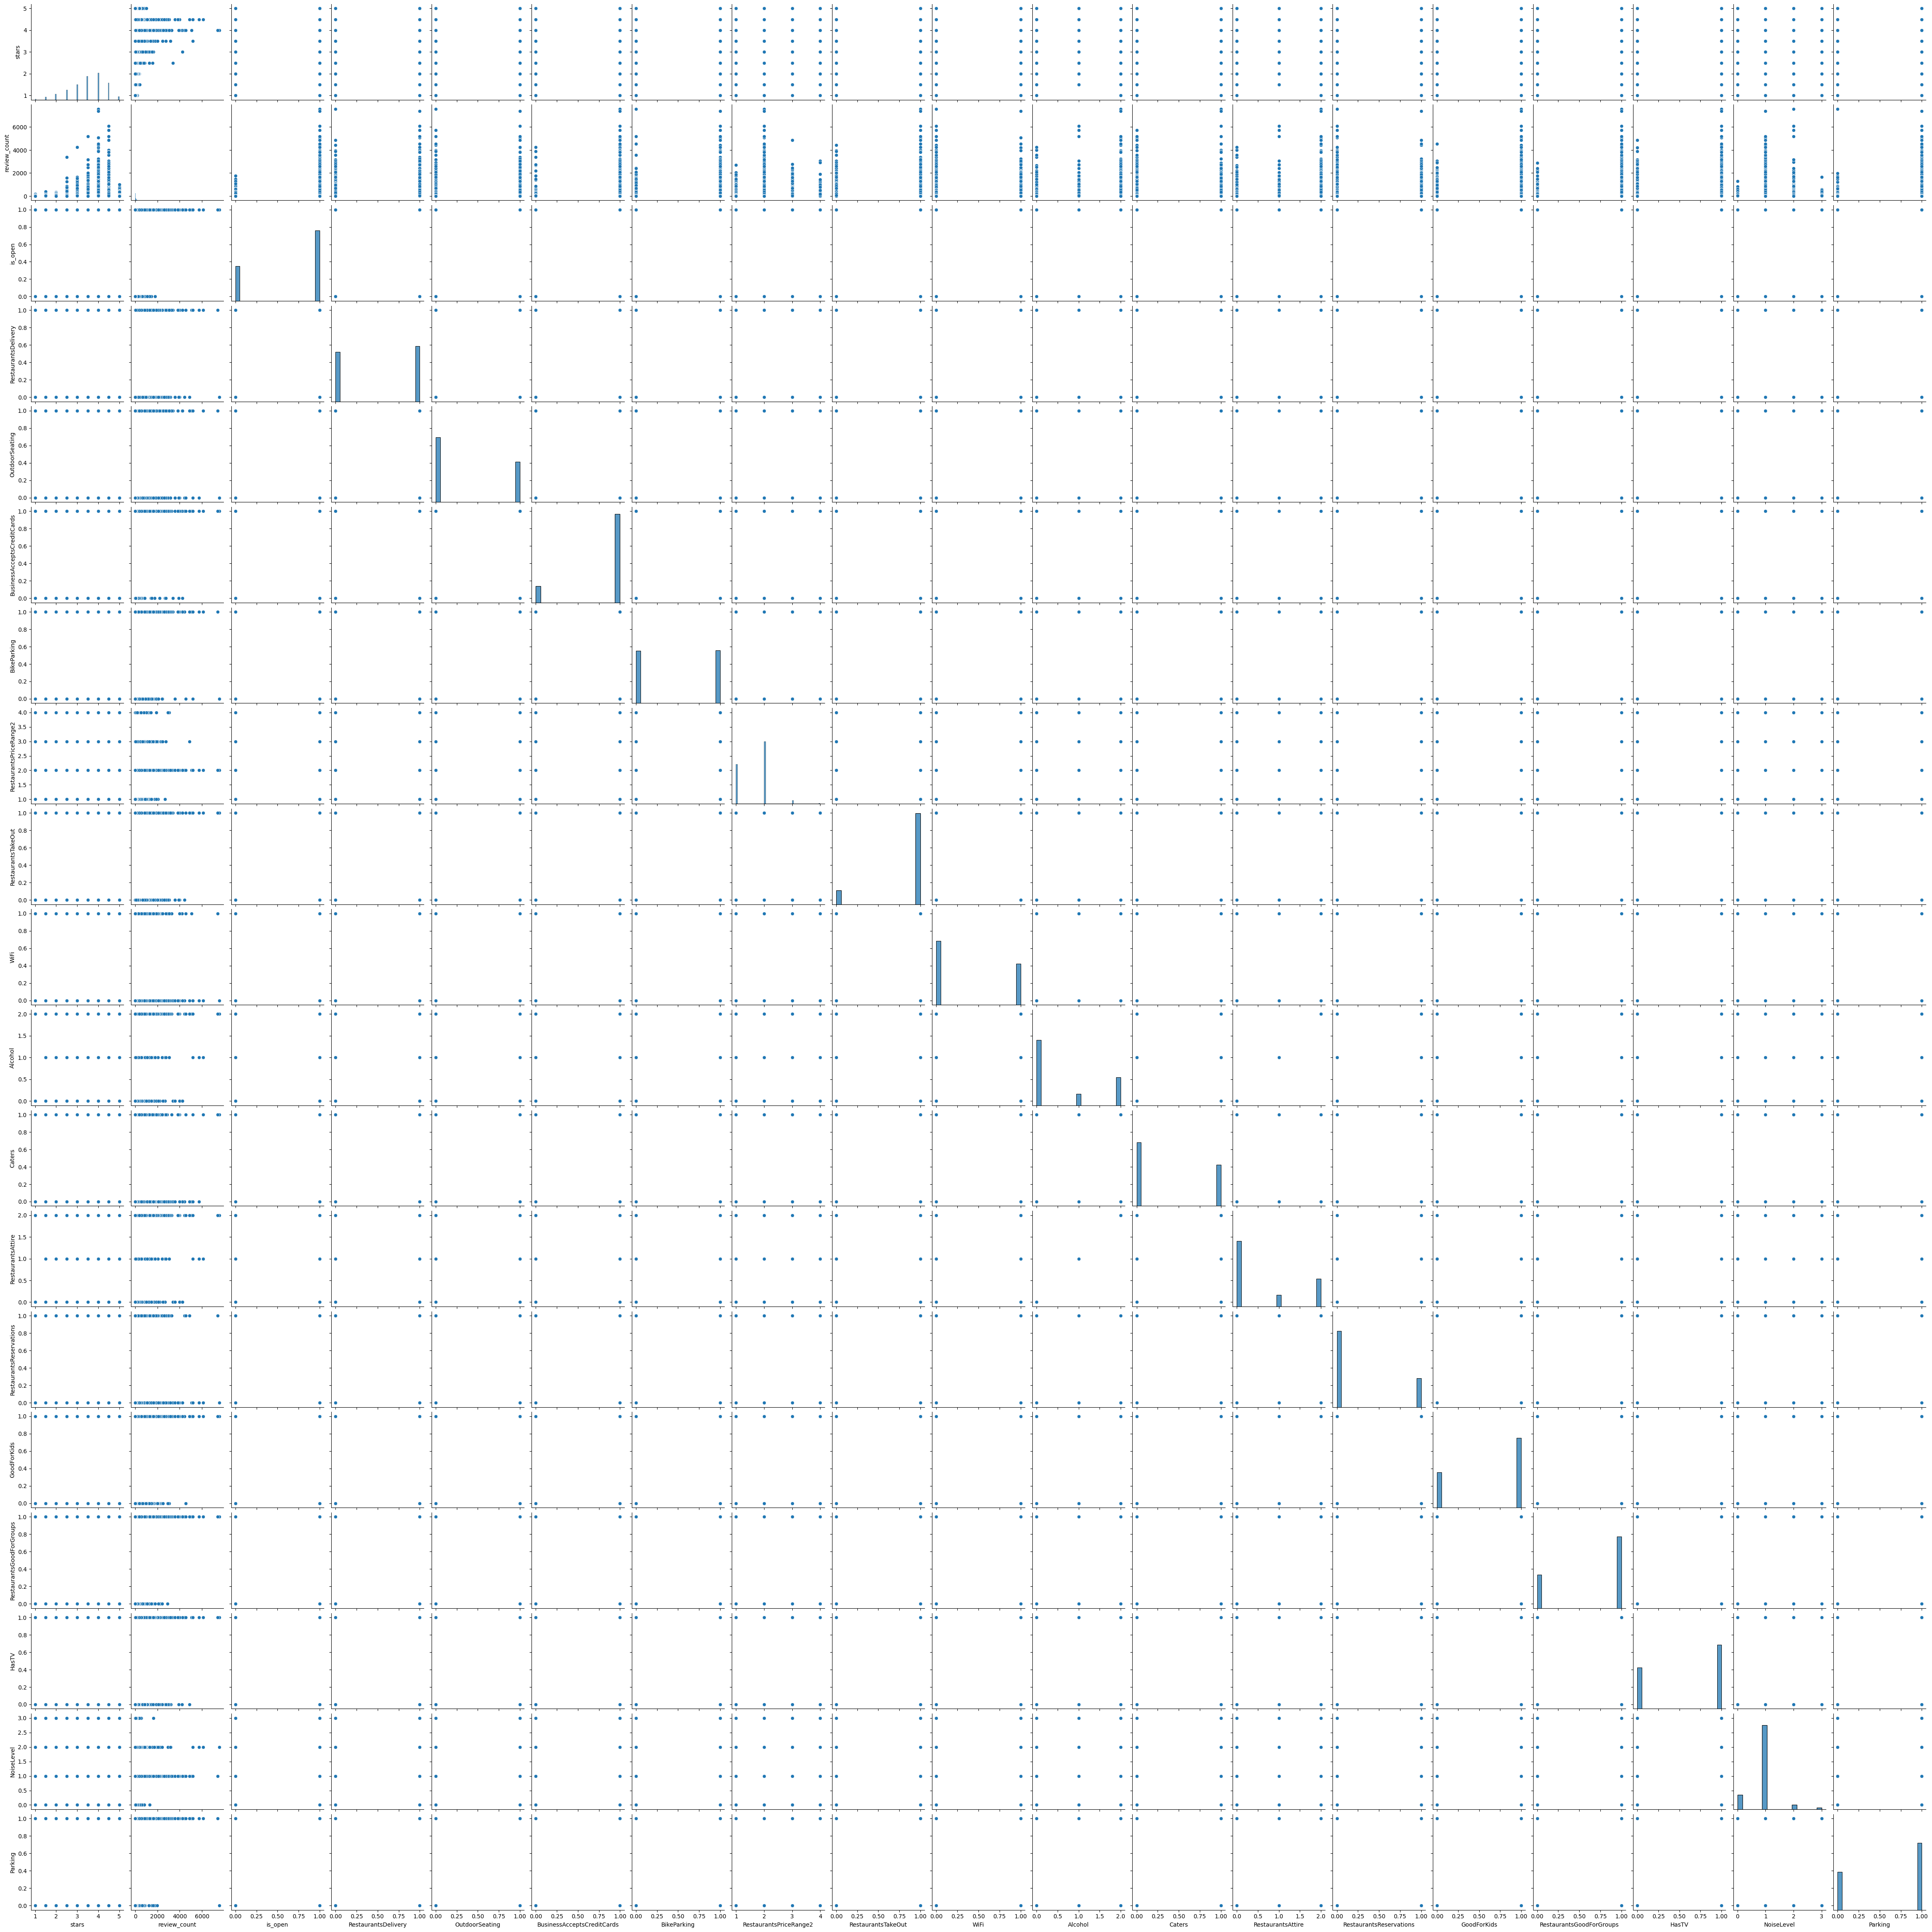

In [ ]:
#visualization
import seaborn as sns
sns.pairplot(data=n_df, diag_kind='hist')

<Axes: >

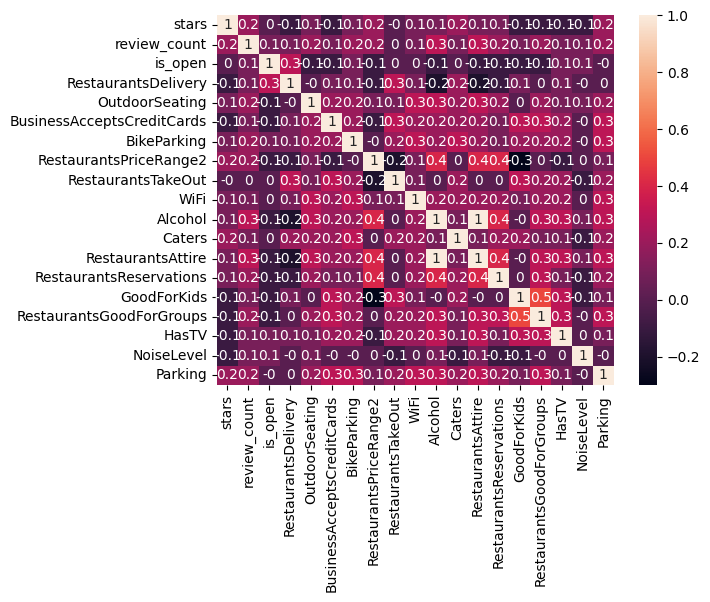

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = n_df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


data = df.drop(['business_id'], axis=1)


X = data.drop(['stars'], axis=1)
y = data['stars']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R² score:', r2)


feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


R² score: 0.15879691444579158
                            importance
review_count                  0.366626
RestaurantsDelivery           0.063339
RestaurantsPriceRange2        0.058185
NoiseLevel                    0.049112
HasTV                         0.042923
Caters                        0.040727
Parking                       0.038656
WiFi                          0.038557
is_open                       0.038100
OutdoorSeating                0.037498
RestaurantsGoodForGroups      0.036260
BikeParking                   0.034628
GoodForKids                   0.032326
BusinessAcceptsCreditCards    0.028887
RestaurantsReservations       0.027390
RestaurantsTakeOut            0.025958
RestaurantsAttire             0.020615
Alcohol                       0.020215


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

n_df = df.drop(['business_id'], axis=1)

y = n_df['stars'].astype('category').cat.codes
X = n_df.drop(['stars'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(y_train.dtype)

int8


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 6, 9, 12, 15, 18],
    'max_features': ['sqrt', 'log2']
}
model = GridSearchCV(classifier, parameters, n_jobs=-1, cv=4, scoring='accuracy', verbose=4)


model.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=4)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = model.best_estimator_.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


feature_importances = pd.DataFrame(model.best_estimator_.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Accuracy: 0.30952380952380953
Confusion Matrix:
 [[   0    0   20    3    1    5   19    3    0]
 [   0    4  122   10    7   64   66   16    0]
 [   0    3  168   22   34  171  151   25    0]
 [   0    1  152   26   56  436  250   51    0]
 [   0    0   97   20   43  717  519   99    0]
 [   0    0   66   24   44 1030 1009  198    0]
 [   0    0   50   15   24  744 1552  331    0]
 [   0    1   23    5    6  276  944  412    1]
 [   0    0    1    0    4   25  173  117    2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.44      0.01      0.03       289
           2       0.24      0.29      0.26       574
           3       0.21      0.03      0.05       972
           4       0.20      0.03      0.05      1495
           5       0.30      0.43      0.35      2371
           6       0.33      0.57      0.42      2716
           7       0.33      0.25      0.28      1668
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


model.fit(X_train_resampled, y_train_resampled)


y_pred_resampled = model.predict(X_test)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_resampled)

print("Resampled Accuracy:", accuracy_resampled)
print("Balanced Accuracy:", balanced_accuracy)


Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Resampled Accuracy: 0.25148211895199846
Balanced Accuracy: 0.24458235029068445


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

n_df = df.drop(['business_id'], axis=1)

y = n_df['is_open']
X = n_df.drop(['is_open'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 6, 9, 12, 15, 18],
    'max_features': ['sqrt', 'log2']
}
model = GridSearchCV(classifier, parameters, n_jobs=-1, cv=4, scoring='accuracy', verbose=4)


model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = model.best_estimator_.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


feature_importances = pd.DataFrame(model.best_estimator_.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.7694587875310767
Confusion Matrix:
 [[1640 1760]
 [ 651 6407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.48      0.58      3400
           1       0.78      0.91      0.84      7058

    accuracy                           0.77     10458
   macro avg       0.75      0.70      0.71     10458
weighted avg       0.76      0.77      0.76     10458

Feature Importances:
                             importance
review_count                  0.229398
RestaurantsDelivery           0.198513
stars                         0.082083
HasTV                         0.067598
RestaurantsGoodForGroups      0.050731
NoiseLevel                    0.043370
GoodForKids                   0.038075
RestaurantsReservations       0.037397
RestaurantsPriceRange2        0.033357
BusinessAcceptsCreditCards    0.030909
BikeParking                   0.027906
Alcohol                       0.027787
RestaurantsAttire             0.027353
WiFi  

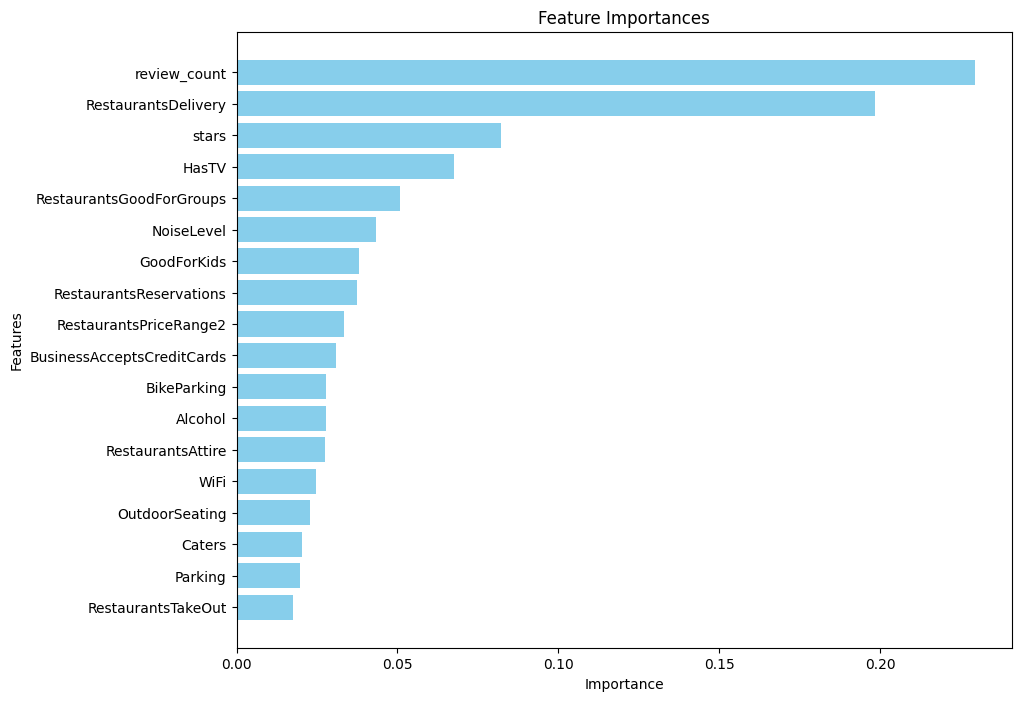

In [ ]:
import matplotlib.pyplot as plt


feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=True)


plt.figure(figsize=(10, 8))
plt.barh(feature_importances_sorted.index, feature_importances_sorted['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


In [ ]:
import pandas as pd
mdf = pd.read_csv("/content/merged_restaurants_attributes (1).csv")
mdf.shape
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 51318 non-null  object 
 1   stars                       51318 non-null  float64
 2   review_count                51318 non-null  int64  
 3   is_open                     51318 non-null  int64  
 4   RestaurantsDelivery         51318 non-null  int64  
 5   OutdoorSeating              51318 non-null  int64  
 6   BusinessAcceptsCreditCards  51318 non-null  int64  
 7   BikeParking                 51318 non-null  int64  
 8   RestaurantsPriceRange2      51318 non-null  int64  
 9   RestaurantsTakeOut          51318 non-null  int64  
 10  WiFi                        51318 non-null  int64  
 11  Alcohol                     51318 non-null  int64  
 12  Caters                      51318 non-null  int64  
 13  RestaurantsAttire           513

business_id                    object
stars                         float64
review_count                    int64
is_open                         int64
RestaurantsDelivery             int64
OutdoorSeating                  int64
BusinessAcceptsCreditCards      int64
BikeParking                     int64
RestaurantsPriceRange2          int64
RestaurantsTakeOut              int64
WiFi                            int64
Alcohol                         int64
Caters                          int64
RestaurantsAttire               int64
RestaurantsReservations         int64
GoodForKids                     int64
RestaurantsGoodForGroups        int64
HasTV                           int64
NoiseLevel                      int64
Parking                         int64
total_number_of_checkin         int64
dtype: object


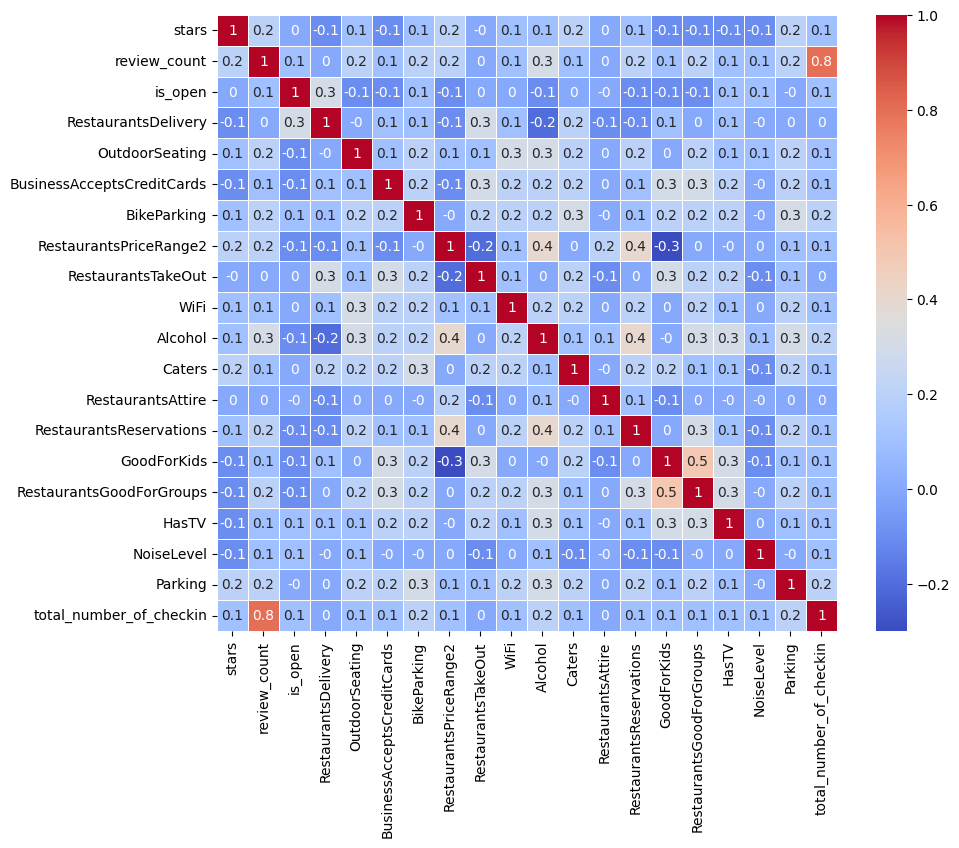

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print(mdf.dtypes)


numeric_mdf = mdf.select_dtypes(include=[np.number])


correlation_matrix = numeric_mdf.corr().round(1)


plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

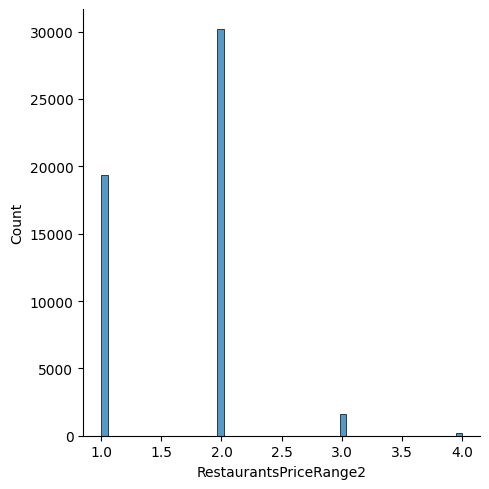

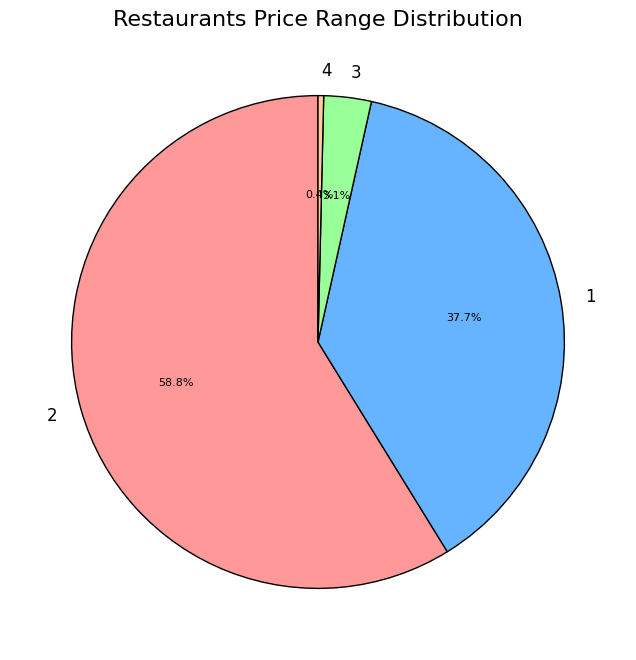

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.displot(mdf['RestaurantsPriceRange2'])


price_counts = mdf['RestaurantsPriceRange2'].value_counts()


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})


plt.setp(autotexts, size=8)
plt.setp(texts, size=12)

for text, autotext in zip(texts, autotexts):
    if autotext.get_text() == '0.0%':
        autotext.set_text('')


for wedge, text in zip(wedges, autotexts):
    text.set_color('black')
    text.set_horizontalalignment('center')
    wedge.set_edgecolor('black')


    angle = (wedge.theta1 + wedge.theta2) / 2

    angle_rad = np.deg2rad(angle)

    x = wedge.r * 0.5 * np.cos(angle_rad)
    y = wedge.r * 0.5 * np.sin(angle_rad)


    text.set_position((1.2 * x, 1.2 * y))

plt.title('Restaurants Price Range Distribution', fontsize=16)
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


data = mdf.drop(['business_id'], axis=1)


X = data.drop(['total_number_of_checkin'], axis=1)
y = data['total_number_of_checkin']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R² score:', r2)


feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


R² score: 0.47996297186179315
                            importance
review_count                  0.853711
WiFi                          0.022127
stars                         0.020223
NoiseLevel                    0.013009
OutdoorSeating                0.010363
RestaurantsPriceRange2        0.009148
Caters                        0.009110
RestaurantsReservations       0.008445
HasTV                         0.006746
RestaurantsDelivery           0.006649
BikeParking                   0.006431
GoodForKids                   0.006367
Alcohol                       0.005703
RestaurantsTakeOut            0.005361
RestaurantsAttire             0.005220
RestaurantsGoodForGroups      0.003852
is_open                       0.003797
Parking                       0.002323
BusinessAcceptsCreditCards    0.001415


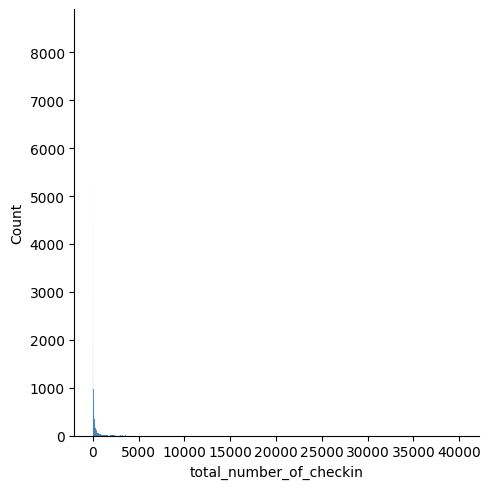

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.displot(mdf['total_number_of_checkin'])

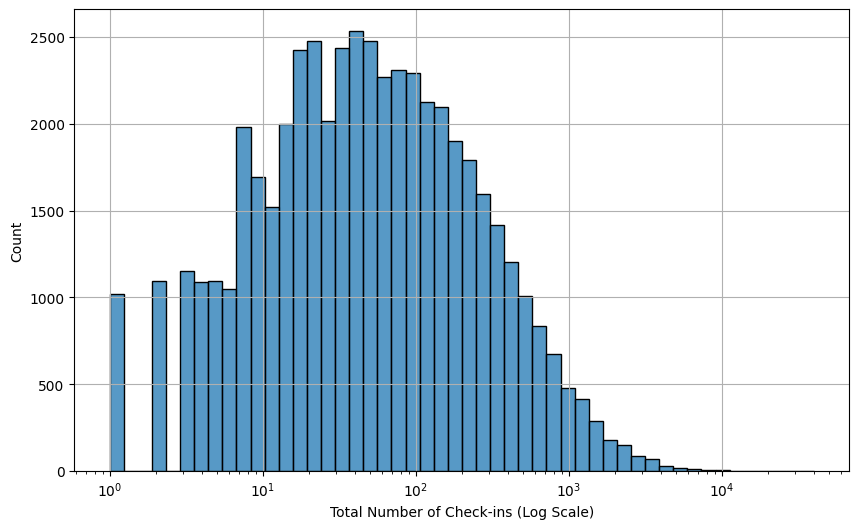

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
ax = sns.histplot(mdf['total_number_of_checkin'], log_scale=True, bins=50)


ax.set_xlabel('Total Number of Check-ins (Log Scale)')
ax.set_ylabel('Count')


plt.grid(True)


plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

m_df=mdf.drop(['business_id','review_count'], axis=1)

results = {}
for column in m_df.columns:
    if column != 'total_number_of_checkin':
        pbc = pointbiserialr(m_df['total_number_of_checkin'], m_df[column])
        results[column] = {'correlation': pbc.correlation, 'p_value': pbc.pvalue}


correlation_results = pd.DataFrame(results).T.sort_values(by='correlation', ascending=False)
print(correlation_results)


                            correlation        p_value
Alcohol                        0.217031   0.000000e+00
RestaurantsAttire              0.217031   0.000000e+00
Parking                        0.200923   0.000000e+00
BikeParking                    0.185565   0.000000e+00
RestaurantsGoodForGroups       0.145531  6.980505e-241
OutdoorSeating                 0.143571  2.000992e-234
WiFi                           0.118543  5.950348e-160
BusinessAcceptsCreditCards     0.104914  1.561285e-125
RestaurantsPriceRange2         0.103800  6.552287e-123
stars                          0.099076  4.241984e-112
RestaurantsReservations        0.096883  2.977630e-107
is_open                        0.091378   1.411972e-95
Caters                         0.074207   1.392113e-63
NoiseLevel                     0.073421   2.805397e-62
GoodForKids                    0.072989   1.442855e-61
HasTV                          0.059452   2.062147e-41
RestaurantsTakeOut             0.024659   2.311940e-08
Restaurant

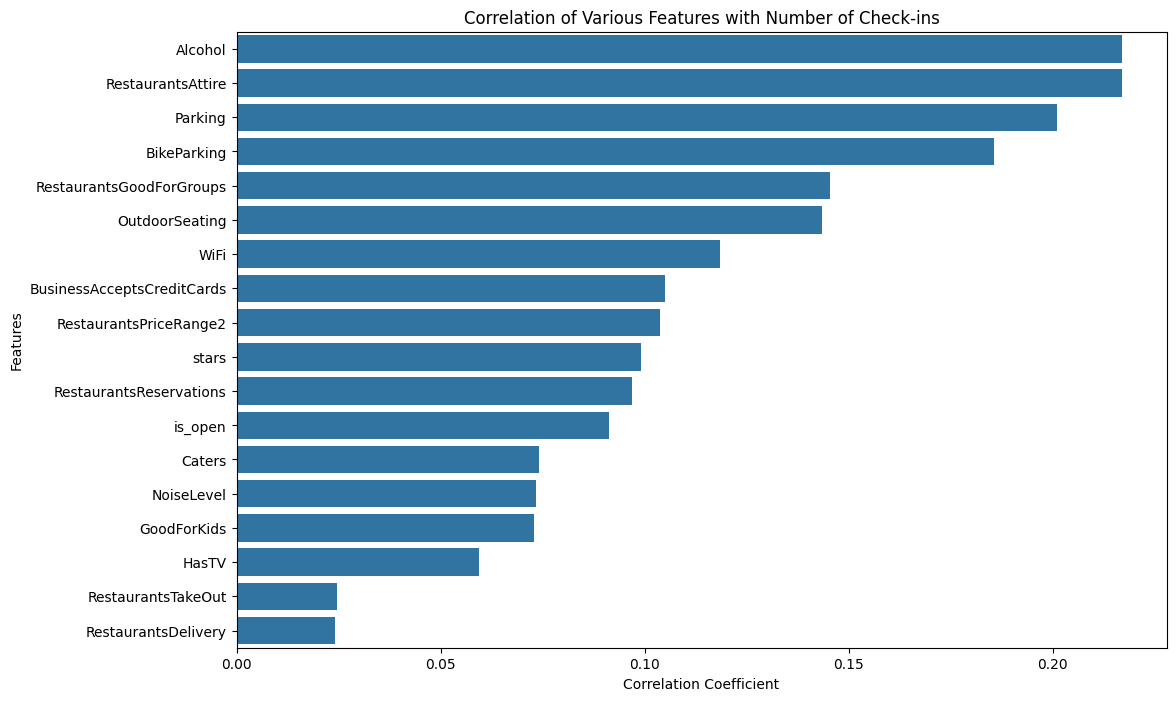

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_data = pd.DataFrame({
    'Feature': correlation_results.index,
    'Correlation': correlation_results['correlation']
})


plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', data=correlation_data.sort_values(by='Correlation', ascending=False))
plt.title('Correlation of Various Features with Number of Check-ins')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [ ]:
import statsmodels.api as sm


X = m_df.drop(['total_number_of_checkin'], axis=1)
y = m_df['total_number_of_checkin']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     total_number_of_checkin   R-squared:                       0.111
Model:                                 OLS   Adj. R-squared:                  0.111
Method:                      Least Squares   F-statistic:                     377.1
Date:                     Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                             11:16:28   Log-Likelihood:            -3.8522e+05
No. Observations:                    51318   AIC:                         7.705e+05
Df Residuals:                        51300   BIC:                         7.706e+05
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
import pandas as pd


percentiles = [0.25, 0.5, 0.75]
percentile_values = m_df['total_number_of_checkin'].quantile(percentiles)

print("Percentile values for 'total_number_of_checkin':")
print(percentile_values)


m_df['checkin_category'] = pd.qcut(m_df['total_number_of_checkin'], 4, labels=['0', '1', '2', '3'])


print(m_df[['total_number_of_checkin', 'checkin_category']].head())


Percentile values for 'total_number_of_checkin':
0.25     14.0
0.50     46.0
0.75    152.0
Name: total_number_of_checkin, dtype: float64
   total_number_of_checkin checkin_category
0                       11                0
1                       10                0
2                       10                0
3                       32                1
4                       67                2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



y = m_df['checkin_category']
X = m_df.drop(['total_number_of_checkin','checkin_category'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 6, 9, 12, 15, 18],
    'max_features': ['sqrt', 'log2']
}
model = GridSearchCV(classifier, parameters, n_jobs=-1, cv=4, scoring='accuracy', verbose=4)


model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = model.best_estimator_.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


feature_importances = pd.DataFrame(model.best_estimator_.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.5239672642244739
Confusion Matrix:
 [[1712  598  210   69]
 [ 764  884  585  312]
 [ 219  499  921  874]
 [  68  128  560 1861]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      2589
           1       0.42      0.35      0.38      2545
           2       0.40      0.37      0.38      2513
           3       0.60      0.71      0.65      2617

    accuracy                           0.52     10264
   macro avg       0.51      0.52      0.51     10264
weighted avg       0.51      0.52      0.52     10264

Feature Importances:
                             importance
Parking                       0.219347
BikeParking                   0.130219
RestaurantsGoodForGroups      0.104740
Alcohol                       0.070760
RestaurantsAttire             0.070144
BusinessAcceptsCreditCards    0.056666
GoodForKids                   0.046641
is_open                       0.046299
HasTV                      

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   4.9s
[CV] END m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   8.1s
[CV] END m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, n_estimators=300; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, n_estimators=300; total time=   7.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   7.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   6.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   7.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=  10.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   9.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=  10.3s
[CV] END m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 300}
Best score: 0.5261608106506586


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gbm.fit(X_train, y_train)


y_pred = gbm.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5271823850350741
Confusion Matrix:
 [[1675  599  212  103]
 [ 719  925  596  305]
 [ 221  488  931  873]
 [  69  127  541 1880]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.64      2589
           1       0.43      0.36      0.39      2545
           2       0.41      0.37      0.39      2513
           3       0.59      0.72      0.65      2617

    accuracy                           0.53     10264
   macro avg       0.51      0.52      0.52     10264
weighted avg       0.52      0.53      0.52     10264



In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




y = y.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5213367108339828
Confusion Matrix:
 [[1681  587  219  102]
 [ 740  874  608  323]
 [ 228  466  926  893]
 [  74  124  549 1870]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63      2589
           1       0.43      0.34      0.38      2545
           2       0.40      0.37      0.38      2513
           3       0.59      0.71      0.64      2617

    accuracy                           0.52     10264
   macro avg       0.51      0.52      0.51     10264
weighted avg       0.51      0.52      0.51     10264

